# This notebook presents the results for the rank method.

### Régularité mensuelle TGV par liaisons

### https://data.sncf.com/explore/dataset/regularite-mensuelle-tgv-aqst/information/?sort=periode

In [1]:
import pandas
import matplotlib.pyplot as plt
fichier="regularite-mensuelle-tgv-aqst.csv"

#df = pandas.read_csv(fichier,sep=";")
df=pandas.read_table(fichier,sep=";")
df.head(5)  #  afficher les 5 premières lignes

,Année,Mois,Service,Gare de départ,Gare d'arrivée,Durée moyenne du trajet (min),Nombre de circulations prévues,Nombre de trains annulés,Commentaire (facultatif) annulations,Nombre de trains en retard au départ,...,Retard moyen trains en retard > 15min,Nombre trains en retard > 30min,Nombre trains en retard > 60min,Période,Retard pour causes externes,Retard à cause infrastructure ferroviaire,Retard à cause gestion trafic,Retard à cause matériel roulant,Retard à cause gestion en gare et réutilisation de matériel,Retard à cause prise en compte voyageurs
0,2018,3.0,NaN,STRASBOURG,PARIS EST,112.402439,505.0,13.0,NaN,250.0,...,5.754031,26.0,6.0,2018-03,37.662338,15.584416,19.480519,16.883117,6.493506,3.896104
1,2018,3.0,NaN,PARIS NORD,DUNKERQUE,120.996310,285.0,14.0,NaN,65.0,...,6.697417,19.0,7.0,2018-03,30.769231,17.948718,15.384615,33.333333,2.564103,0.000000
2,2018,3.0,NaN,LYON PART DIEU,PARIS LYON,120.549770,664.0,11.0,NaN,404.0,...,2.210031,12.0,1.0,2018-03,39.215686,5.882353,13.725490,23.529412,15.686275,1.960784
3,2018,3.0,NaN,PARIS LYON,GENEVE,194.005000,203.0,3.0,NaN,26.0,...,0.982500,4.0,0.0,2018-03,25.000000,15.000000,35.000000,10.000000,15.000000,0.000000
4,2018,8.0,NaN,LILLE,MARSEILLE ST CHARLES,309.389535,173.0,1.0,NaN,46.0,...,10.442151,13.0,6.0,2018-08,25.925926,7.407407,18.518519,29.629630,11.111111,7.407407


### Mann-Whitney rank test

In [2]:
import scipy.stats
import pandas as pd
df=df.sort_values(by=[df.columns[0] , df.columns[1]])
signal = df[df['Gare de départ']=='PARIS EST']['Nombre de circulations prévues'].to_numpy()

def Detection_Rupture(data, debut, fin):
    pv = 1
    position = 0
    for i in range (debut+1, fin-1):
        data1 = data[debut:i]
        data2 = data[i:fin]
        if scipy.stats.mannwhitneyu(data1, data2).pvalue < pv:
            position = i
            pv = scipy.stats.mannwhitneyu(data1, data2).pvalue
    return(position, pv)

def Segmentation_Binaire(data, debut, fin, alpha):
    L = []
    position, pvalue = Detection_Rupture(data, debut, fin)
    print(pvalue)
    if pvalue < alpha:
        L.append(position)
        L1 = Segmentation_Binaire(data, debut, position, alpha)
        L2 = Segmentation_Binaire(data, position, fin, alpha)
        L = L + L1 + L2
    return(L)



### Paris Est

0.00231356360647
0.00250607812419
0.0415112705578
0.270145687304
0.0724287465081
k_rupture =  [140, 137]
Paris Est  :  Nombre de circulations prévues


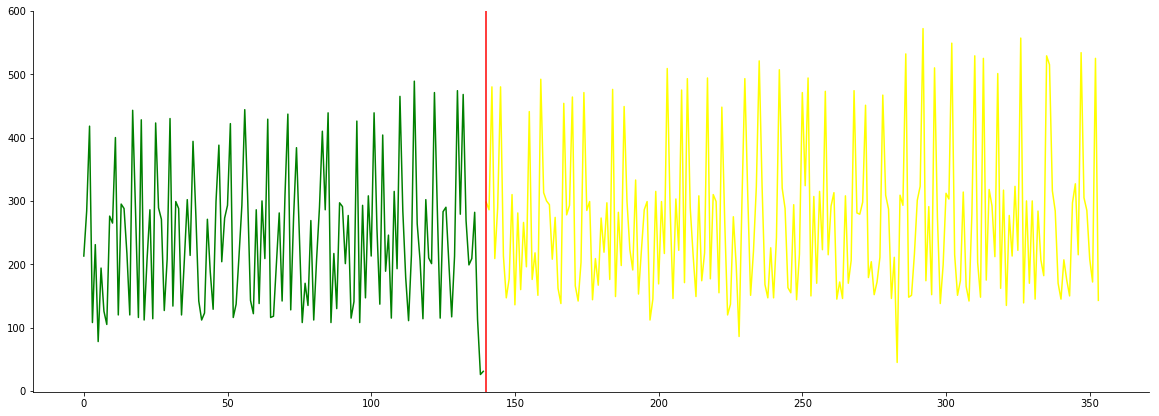

In [4]:
result = Segmentation_Binaire(signal, 0, len(signal), 0.01)

print("k_rupture = ", result)
print('Paris Est', " : ",'Nombre de circulations prévues' )
fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(111)
    # cacher les cadres : haut et droit
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


ax1.xaxis.set_ticks_position('bottom')

l1 = [k for k in range(result[0])]
#l2 = [k for k in range(result[0],result[1])]
#l3 = [k for k in range(result[1],result[2])]
l4 = [k for k in range(result[0],signal.shape[0])]

plt.plot(l1,signal[:result[0]], color = 'green')
#plt.plot(l2,signal[result[0]:result[1]], color = 'blue')
#plt.plot(l3,signal[result[1]:result[2]], color = 'black')
plt.plot(l4,signal[result[0]:], color = 'yellow')
plt.axvline(x=result[0],color='red')
#plt.axvline(x=result[1],color='red')
#plt.axvline(x=result[2],color='red')

plt.show()

2.56149817383e-08
0.00748026056039
0.0395358044254
0.05259625256
0.00405756008479
0.0680185640571
0.0773644617427
k_rupture =  [18, 24, 48]
Paris Est  :  Nombre de circulations prévues


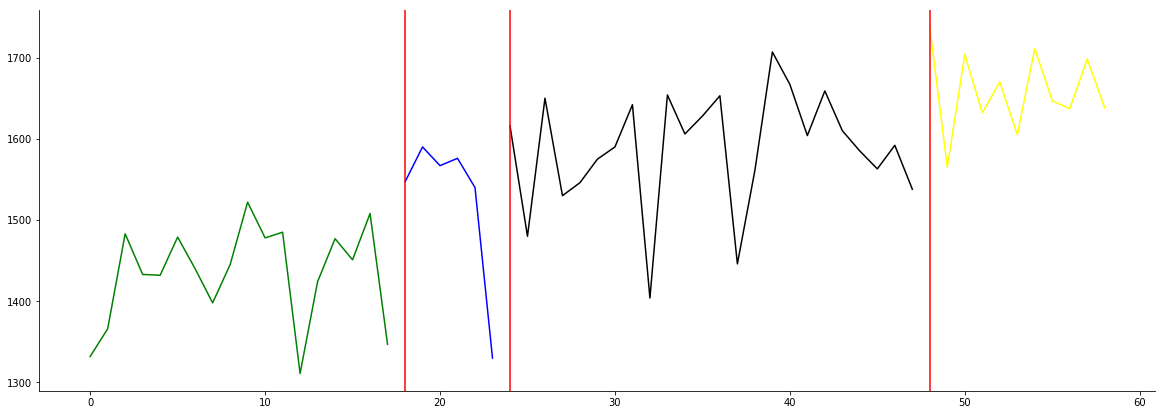

In [5]:
df=df[df['Gare de départ']=='PARIS EST']
df=df.sort_values(by=[df.columns[0],df.columns[1]])
df=df[['Année','Mois','Gare de départ','Nombre de circulations prévues','Nombre de trains annulés']]
dd = df.groupby(['Année','Mois'])['Nombre de circulations prévues'].sum().to_numpy()

result1 = Segmentation_Binaire(dd, 0, len(dd), 0.01)
result1.sort()

print("k_rupture = ", result1)
print('Paris Est', " : ",'Nombre de circulations prévues' )
fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(111)
    # cacher les cadres : haut et droit
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


ax1.xaxis.set_ticks_position('bottom')

l1 = [k for k in range(result1[0])]
l2 = [k for k in range(result1[0],result1[1])]
l3 = [k for k in range(result1[1],result1[2])]
l4 = [k for k in range(result1[2],dd.shape[0])]

plt.plot(l1,dd[:result1[0]], color = 'green')
plt.plot(l2,dd[result1[0]:result1[1]], color = 'blue')
plt.plot(l3,dd[result1[1]:result1[2]], color = 'black')
plt.plot(l4,dd[result1[2]:], color = 'yellow')

#plt.plot(l1,dd[:result1[0]], color = 'green')
#plt.plot(l2,dd[result1[0]:], color = 'blue')
for i in result1 :
    plt.axvline(x=i,color='red')

plt.show()

1.86269451355e-07
0.013717721078
0.00861629307984
0.12286935017
0.00339789635452
0.0876221227
0.133014048859
k_rupture =  [24, 36, 43]
Paris Est  :  Nombre de trains annulés


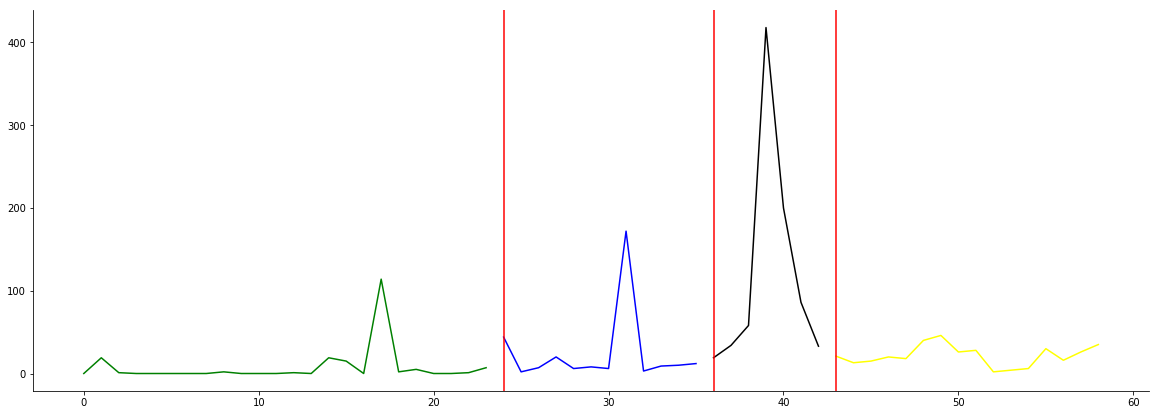

In [6]:
df=df[df['Gare de départ']=='PARIS EST']
df=df.sort_values(by=[df.columns[0],df.columns[1]])
df=df[['Année','Mois','Gare de départ','Nombre de circulations prévues','Nombre de trains annulés']]
dd1 = df.groupby(['Année','Mois'])['Nombre de trains annulés'].sum().to_numpy()

result1 = Segmentation_Binaire(dd1, 0, len(dd1), 0.01)
result1.sort()

print("k_rupture = ", result1)
print('Paris Est', " : ",'Nombre de trains annulés' )
fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(111)
    # cacher les cadres : haut et droit
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


ax1.xaxis.set_ticks_position('bottom')

l1 = [k for k in range(result1[0])]
l2 = [k for k in range(result1[0],result1[1])]
l3 = [k for k in range(result1[1],result1[2])]
l4 = [k for k in range(result1[2],dd1.shape[0])]

plt.plot(l1,dd1[:result1[0]], color = 'green')
plt.plot(l2,dd1[result1[0]:result1[1]], color = 'blue')
plt.plot(l3,dd1[result1[1]:result1[2]], color = 'black')
plt.plot(l4,dd1[result1[2]:], color = 'yellow')

#plt.plot(l1,dd[:result1[0]], color = 'green')
#plt.plot(l2,dd[result1[0]:], color = 'blue')
for i in result1 :
    plt.axvline(x=i,color='red')

plt.show()

### Paris Lyon

0.0129100815048
0.00214434608281
0.00811502428731
0.270145687304
0.0285199371245
0.0783619339726
6.75882200318e-05
0.00915892093993
0.122639058403
0.123579986606
0.05118854956
k_rupture =  [3, 12, 29, 38, 44]
Paris Lyon  :  Nombre de circulations prévues


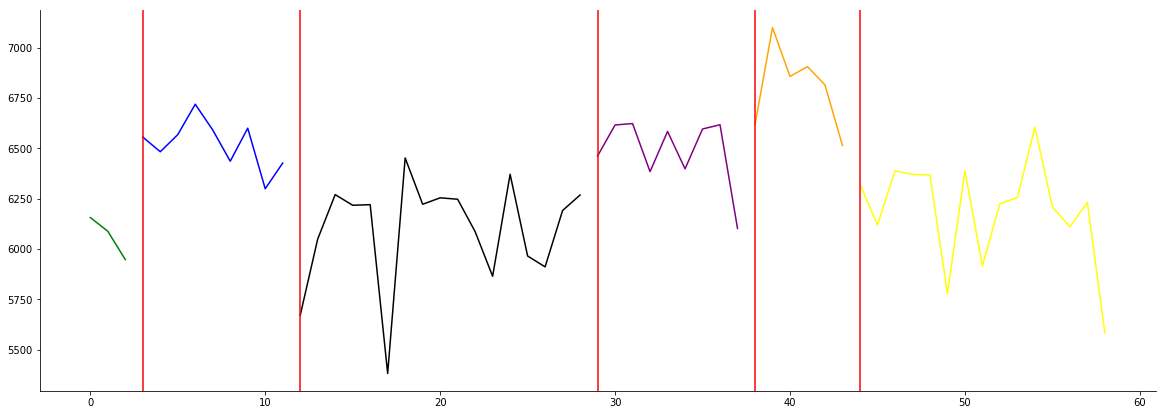

In [7]:
df=pandas.read_table(fichier,sep=";")
df.head(5)  #  afficher les 5 premières lignes
df=df.sort_values(by=[df.columns[0] , df.columns[1]])
df.head(9)

df=df[df['Gare de départ']=='PARIS LYON']
df=df.sort_values(by=[df.columns[0],df.columns[1]])
df=df[['Année','Mois','Gare de départ','Nombre de circulations prévues','Nombre de trains annulés']]
dd = df.groupby(['Année','Mois'])['Nombre de circulations prévues'].sum().to_numpy()

result1 = Segmentation_Binaire(dd, 0, len(dd), 0.02)
result1.sort()

print("k_rupture = ", result1)
print('Paris Lyon', " : ",'Nombre de circulations prévues' )
fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(111)
    # cacher les cadres : haut et droit
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


ax1.xaxis.set_ticks_position('bottom')

l1 = [k for k in range(result1[0])]
l2 = [k for k in range(result1[0],result1[1])]
l3 = [k for k in range(result1[1],result1[2])]
l4 = [k for k in range(result1[2],result1[3])]
l5 = [k for k in range(result1[3],result1[4])]
l6 = [k for k in range(result1[4],dd.shape[0])]

plt.plot(l1,dd[:result1[0]], color = 'green')
plt.plot(l2,dd[result1[0]:result1[1]], color = 'blue')
plt.plot(l3,dd[result1[1]:result1[2]], color = 'black')
plt.plot(l4,dd[result1[2]:result1[3]], color = 'purple')
plt.plot(l5,dd[result1[3]:result1[4]], color = 'orange')
plt.plot(l6,dd[result1[4]:], color = 'yellow')

#plt.plot(l1,dd[:result1[0]], color = 'green')
#plt.plot(l2,dd[result1[0]:], color = 'blue')
for i in result1 :
    plt.axvline(x=i,color='red')

plt.show()

0.000214979606841
0.0500901548094
0.0387408415619
k_rupture =  [23]
Paris Lyon  :  Nombre de trains annulés


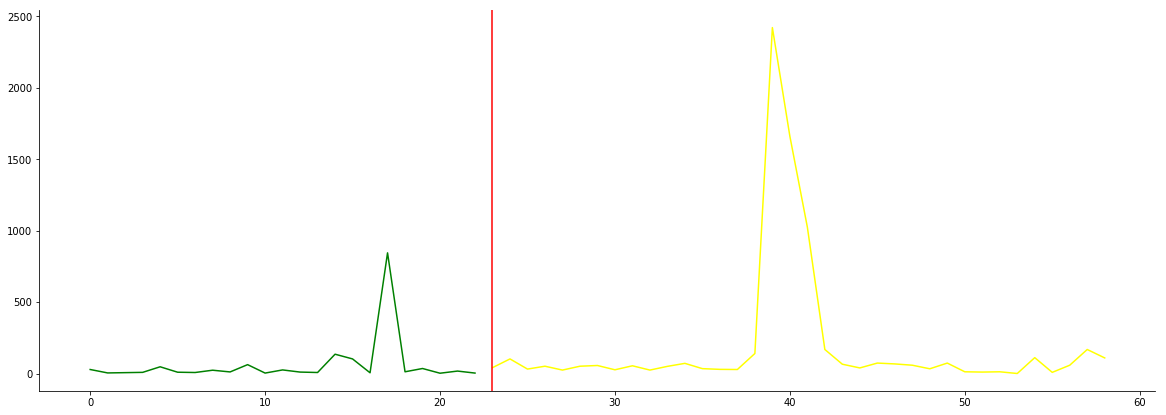

In [8]:
df=df[df['Gare de départ']=='PARIS LYON']
df=df.sort_values(by=[df.columns[0],df.columns[1]])
df=df[['Année','Mois','Gare de départ','Nombre de circulations prévues','Nombre de trains annulés']]
dd1 = df.groupby(['Année','Mois'])['Nombre de trains annulés'].sum().to_numpy()

result1 = Segmentation_Binaire(dd1, 0, len(dd1), 0.01)
result1.sort()

print("k_rupture = ", result1)
print('Paris Lyon', " : ",'Nombre de trains annulés' )
fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(111)
    # cacher les cadres : haut et droit
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


ax1.xaxis.set_ticks_position('bottom')

l1 = [k for k in range(result1[0])]
l2 = [k for k in range(result1[0],dd1.shape[0])]

plt.plot(l1,dd1[:result1[0]], color = 'green')
plt.plot(l2,dd1[result1[0]:], color = 'yellow')

#plt.plot(l1,dd[:result1[0]], color = 'green')
#plt.plot(l2,dd[result1[0]:], color = 'blue')
for i in result1 :
    plt.axvline(x=i,color='red')

plt.show()

### Paris Montparnasse

0.000653519713711
0.0556669119455
0.0343385823735
k_rupture =  [29]
Paris Montparnasse  :  Nombre de circulations prévues


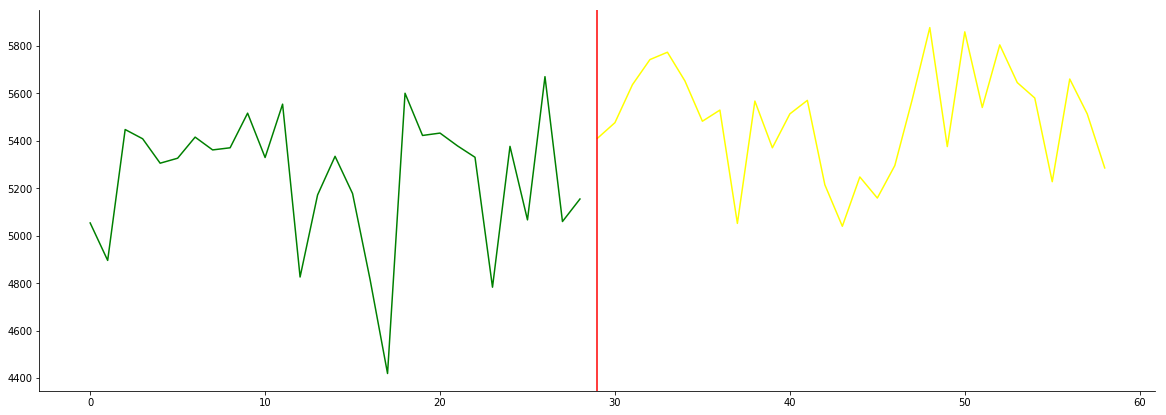

In [9]:
df=pandas.read_table(fichier,sep=";")
df.head(5)  #  afficher les 5 premières lignes
df=df.sort_values(by=[df.columns[0] , df.columns[1]])
df.head(9)

df=df[df['Gare de départ']=='PARIS MONTPARNASSE']
df=df.sort_values(by=[df.columns[0],df.columns[1]])
df=df[['Année','Mois','Gare de départ','Nombre de circulations prévues','Nombre de trains annulés']]
dd = df.groupby(['Année','Mois'])['Nombre de circulations prévues'].sum().to_numpy()

result1 = Segmentation_Binaire(dd, 0, len(dd), 0.02)
result1.sort()

print("k_rupture = ", result1)
print('Paris Montparnasse', " : ",'Nombre de circulations prévues' )
fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(111)
    # cacher les cadres : haut et droit
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


ax1.xaxis.set_ticks_position('bottom')

l1 = [k for k in range(result1[0])]
l6 = [k for k in range(result1[0],dd.shape[0])]

plt.plot(l1,dd[:result1[0]], color = 'green')
plt.plot(l6,dd[result1[0]:], color = 'yellow')

#plt.plot(l1,dd[:result1[0]], color = 'green')
#plt.plot(l2,dd[result1[0]:], color = 'blue')
for i in result1 :
    plt.axvline(x=i,color='red')

plt.show()

4.68385691539e-06
0.00283119697329
0.0118257381268
k_rupture =  [23]
Paris Montparnasse  :  Nombre de trains annulés


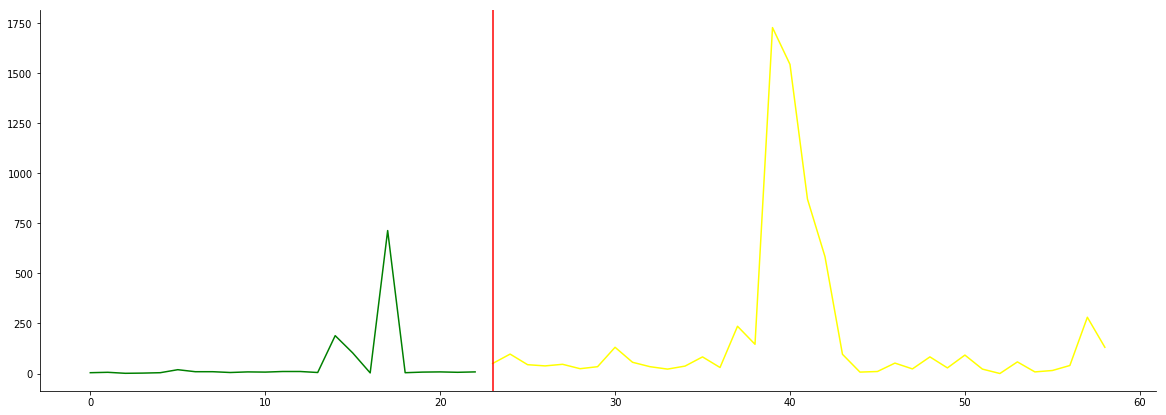

In [10]:
df=df[df['Gare de départ']=='PARIS MONTPARNASSE']
df=df.sort_values(by=[df.columns[0],df.columns[1]])
df=df[['Année','Mois','Gare de départ','Nombre de circulations prévues','Nombre de trains annulés']]
dd1 = df.groupby(['Année','Mois'])['Nombre de trains annulés'].sum().to_numpy()

result1 = Segmentation_Binaire(dd1, 0, len(dd1), 0.001)
result1.sort()

print("k_rupture = ", result1)
print('Paris Montparnasse', " : ",'Nombre de trains annulés' )
fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(111)
    # cacher les cadres : haut et droit
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


ax1.xaxis.set_ticks_position('bottom')

l1 = [k for k in range(result1[0])]
l2 = [k for k in range(result1[0],dd1.shape[0])]

plt.plot(l1,dd1[:result1[0]], color = 'green')
plt.plot(l2,dd1[result1[0]:], color = 'yellow')

#plt.plot(l1,dd[:result1[0]], color = 'green')
#plt.plot(l2,dd[result1[0]:], color = 'blue')
for i in result1 :
    plt.axvline(x=i,color='red')

plt.show()

### Lyon Part Dieu

0.00199062393285
0.000512432176879
0.000199454955157
0.0209808032081
0.0952151319128
0.000738836662056
0.121672504574
0.0627532357187
0.122639058403
k_rupture =  [12, 36, 44, 55]
Lyon Part Dieu  :  Nombre de circulations prévues


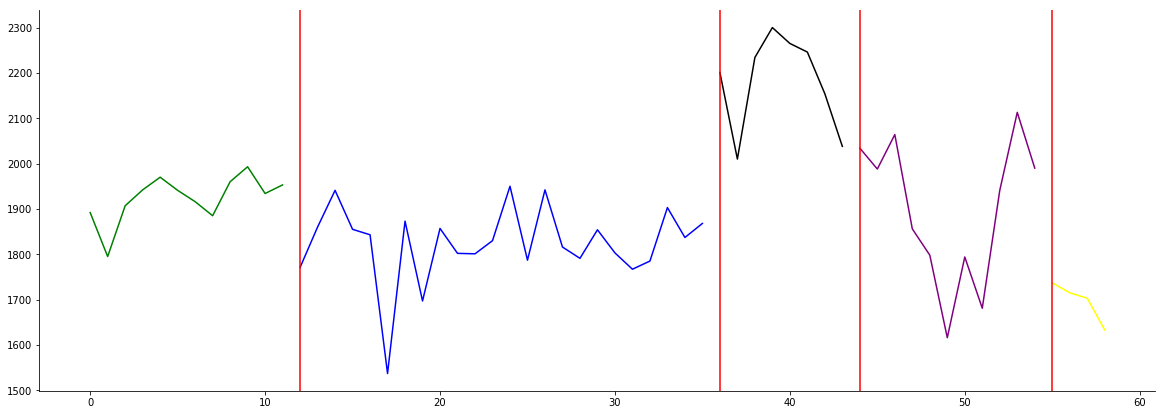

In [11]:
df=pandas.read_table(fichier,sep=";")
df.head(5)  #  afficher les 5 premières lignes
df=df.sort_values(by=[df.columns[0] , df.columns[1]])
df.head(9)

df=df[df['Gare de départ']=='LYON PART DIEU']
df=df.sort_values(by=[df.columns[0],df.columns[1]])
df=df[['Année','Mois','Gare de départ','Nombre de circulations prévues','Nombre de trains annulés']]
dd = df.groupby(['Année','Mois'])['Nombre de circulations prévues'].sum().to_numpy()

result1 = Segmentation_Binaire(dd, 0, len(dd), 0.002)
result1.sort()

print("k_rupture = ", result1)
print('Lyon Part Dieu', " : ",'Nombre de circulations prévues' )
fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(111)
    # cacher les cadres : haut et droit
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


ax1.xaxis.set_ticks_position('bottom')

l1 = [k for k in range(result1[0])]
l2 = [k for k in range(result1[0],result1[1])]
l3 = [k for k in range(result1[1],result1[2])]
l4 = [k for k in range(result1[2],result1[3])]
l5 = [k for k in range(result1[3],dd.shape[0])]

plt.plot(l1,dd[:result1[0]], color = 'green')
plt.plot(l2,dd[result1[0]:result1[1]], color = 'blue')
plt.plot(l3,dd[result1[1]:result1[2]], color = 'black')
plt.plot(l4,dd[result1[2]:result1[3]], color = 'purple')
plt.plot(l5,dd[result1[3]:], color = 'yellow')

#plt.plot(l1,dd[:result1[0]], color = 'green')
#plt.plot(l2,dd[result1[0]:], color = 'blue')
for i in result1 :
    plt.axvline(x=i,color='red')

plt.show()

1.41674657514e-07
0.000676559782775
0.215111345566
0.0149964576129
0.0103778581357
k_rupture =  [7, 33]
Lyon Part Dieu  :  Nombre de trains annulés


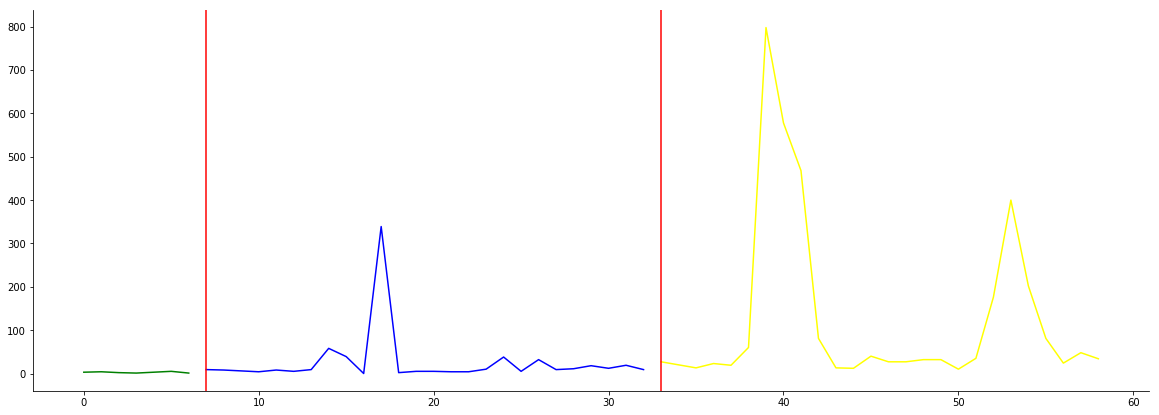

In [12]:
df=df[df['Gare de départ']=='LYON PART DIEU']
df=df.sort_values(by=[df.columns[0],df.columns[1]])
df=df[['Année','Mois','Gare de départ','Nombre de circulations prévues','Nombre de trains annulés']]
dd1 = df.groupby(['Année','Mois'])['Nombre de trains annulés'].sum().to_numpy()

result1 = Segmentation_Binaire(dd1, 0, len(dd1), 0.01)
result1.sort()

print("k_rupture = ", result1)
print('Lyon Part Dieu', " : ",'Nombre de trains annulés' )
fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(111)
    # cacher les cadres : haut et droit
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


ax1.xaxis.set_ticks_position('bottom')

l1 = [k for k in range(result1[0])]
l2 = [k for k in range(result1[0],result1[1])]
l3 = [k for k in range(result1[1],dd1.shape[0])]

plt.plot(l1,dd1[:result1[0]], color = 'green')
plt.plot(l2,dd1[result1[0]:result1[1]], color = 'blue')
plt.plot(l3,dd1[result1[1]:], color = 'yellow')

#plt.plot(l1,dd[:result1[0]], color = 'green')
#plt.plot(l2,dd[result1[0]:], color = 'blue')
for i in result1 :
    plt.axvline(x=i,color='red')

plt.show()

### Marseille Saint Charles

2.17497773555e-10
0.00227630142701
0.00811502428731
0.270145687304
0.0186682079603
0.0244629458849
7.68347148639e-05
0.036300469725
0.0322288591353
k_rupture =  [3, 12, 36, 47]
Marseille Saint Charles  :  Nombre de circulations prévues


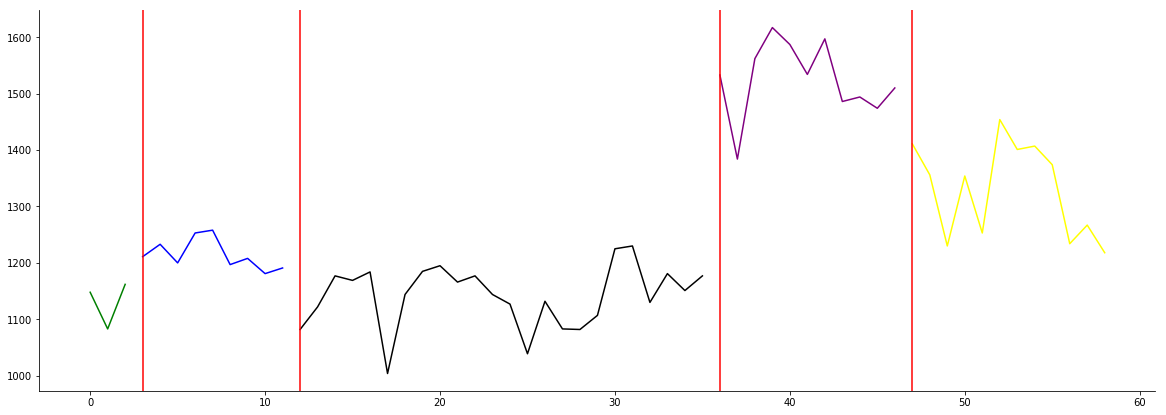

In [13]:
df=pandas.read_table(fichier,sep=";")
df.head(5)  #  afficher les 5 premières lignes
df=df.sort_values(by=[df.columns[0] , df.columns[1]])
df.head(9)

df=df[df['Gare de départ']=='MARSEILLE ST CHARLES']
df=df.sort_values(by=[df.columns[0],df.columns[1]])
df=df[['Année','Mois','Gare de départ','Nombre de circulations prévues','Nombre de trains annulés']]
dd = df.groupby(['Année','Mois'])['Nombre de circulations prévues'].sum().to_numpy()

result1 = Segmentation_Binaire(dd, 0, len(dd), 0.01)
result1.sort()

print("k_rupture = ", result1)
print('Marseille Saint Charles', " : ",'Nombre de circulations prévues' )
fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(111)
    # cacher les cadres : haut et droit
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


ax1.xaxis.set_ticks_position('bottom')

l1 = [k for k in range(result1[0])]
l2 = [k for k in range(result1[0],result1[1])]
l3 = [k for k in range(result1[1],result1[2])]
l4 = [k for k in range(result1[2],result1[3])]
l5 = [k for k in range(result1[3],dd.shape[0])]

plt.plot(l1,dd[:result1[0]], color = 'green')
plt.plot(l2,dd[result1[0]:result1[1]], color = 'blue')
plt.plot(l3,dd[result1[1]:result1[2]], color = 'black')
plt.plot(l4,dd[result1[2]:result1[3]], color = 'purple')
plt.plot(l5,dd[result1[3]:], color = 'yellow')

#plt.plot(l1,dd[:result1[0]], color = 'green')
#plt.plot(l2,dd[result1[0]:], color = 'blue')
for i in result1 :
    plt.axvline(x=i,color='red')

plt.show()

6.690611433e-08
0.0221359602719
0.00239007305015
0.0659384511187
0.00278928323301
0.144422183173
0.0127827867322
k_rupture =  [24, 38, 43]
Marseille Saint Charles  :  Nombre de trains annulés


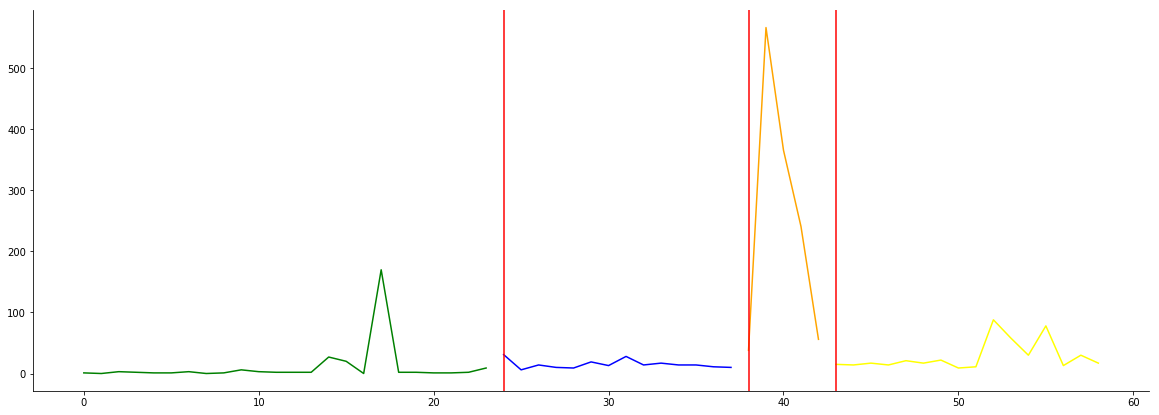

In [14]:
df=df[df['Gare de départ']=='MARSEILLE ST CHARLES']
df=df.sort_values(by=[df.columns[0],df.columns[1]])
df=df[['Année','Mois','Gare de départ','Nombre de circulations prévues','Nombre de trains annulés']]
dd1 = df.groupby(['Année','Mois'])['Nombre de trains annulés'].sum().to_numpy()

result1 = Segmentation_Binaire(dd1, 0, len(dd1), 0.01)
result1.sort()

print("k_rupture = ", result1)
print('Marseille Saint Charles', " : ",'Nombre de trains annulés' )
fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(111)
    # cacher les cadres : haut et droit
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


ax1.xaxis.set_ticks_position('bottom')

l1 = [k for k in range(result1[0])]
l2 = [k for k in range(result1[0],result1[1])]
l3 = [k for k in range(result1[1],result1[2])]
l4 = [k for k in range(result1[2],dd1.shape[0])]

plt.plot(l1,dd1[:result1[0]], color = 'green')
plt.plot(l2,dd1[result1[0]:result1[1]], color = 'blue')
plt.plot(l3,dd1[result1[1]:result1[2]], color = 'orange')
plt.plot(l4,dd1[result1[2]:], color = 'yellow')

#plt.plot(l1,dd[:result1[0]], color = 'green')
#plt.plot(l2,dd[result1[0]:], color = 'blue')
for i in result1 :
    plt.axvline(x=i,color='red')

plt.show()

### Paris Nord

0.056845635046
0.00746930156428
0.153166155726
0.198032910354
0.0140659496328
0.00628592269121
0.0805624746445
0.122639058403
0.0575338947099
0.270145687304
0.122379472788
k_rupture =  [11, 24, 38, 42, 45]
Paris Nord  :  Nombre de circulations prévues


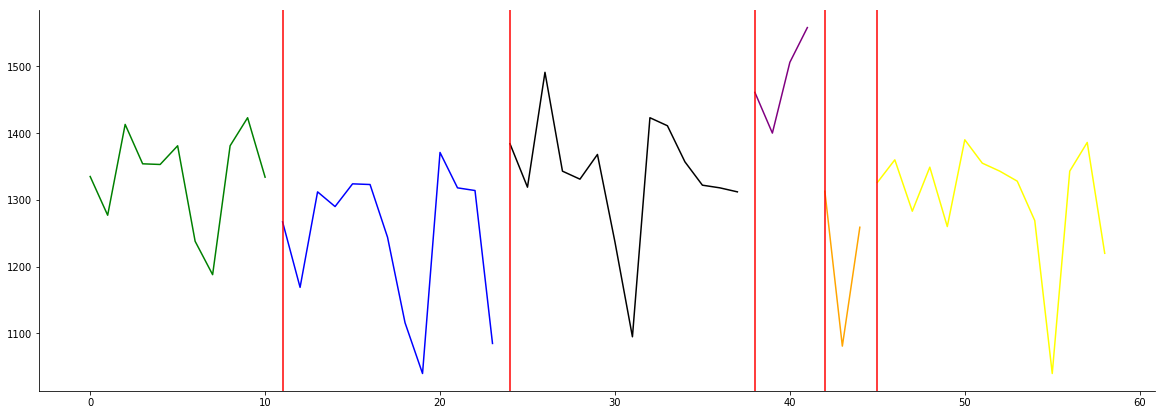

In [15]:
df=pandas.read_table(fichier,sep=";")
df.head(5)  #  afficher les 5 premières lignes
df=df.sort_values(by=[df.columns[0] , df.columns[1]])
df.head(9)

df=df[df['Gare de départ']=='PARIS NORD']
df=df.sort_values(by=[df.columns[0],df.columns[1]])
df=df[['Année','Mois','Gare de départ','Nombre de circulations prévues','Nombre de trains annulés']]
dd = df.groupby(['Année','Mois'])['Nombre de circulations prévues'].sum().to_numpy()

result1 = Segmentation_Binaire(dd, 0, len(dd), 0.06)
result1.sort()

print("k_rupture = ", result1)
print('Paris Nord', " : ",'Nombre de circulations prévues' )
fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(111)
    # cacher les cadres : haut et droit
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


ax1.xaxis.set_ticks_position('bottom')

l1 = [k for k in range(result1[0])]
l2 = [k for k in range(result1[0],result1[1])]
l3 = [k for k in range(result1[1],result1[2])]
l4 = [k for k in range(result1[2],result1[3])]
l5 = [k for k in range(result1[3],result1[4])]
l6 = [k for k in range(result1[4],dd.shape[0])]

plt.plot(l1,dd[:result1[0]], color = 'green')
plt.plot(l2,dd[result1[0]:result1[1]], color = 'blue')
plt.plot(l3,dd[result1[1]:result1[2]], color = 'black')
plt.plot(l4,dd[result1[2]:result1[3]], color = 'purple')
plt.plot(l5,dd[result1[3]:result1[4]], color = 'orange')
plt.plot(l6,dd[result1[4]:], color = 'yellow')

#plt.plot(l1,dd[:result1[0]], color = 'green')
#plt.plot(l2,dd[result1[0]:], color = 'blue')
for i in result1 :
    plt.axvline(x=i,color='red')

plt.show()

1.73357914038e-06
0.012825134559
0.0455536303243
k_rupture =  [30]
Paris Nord  :  Nombre de trains annulés


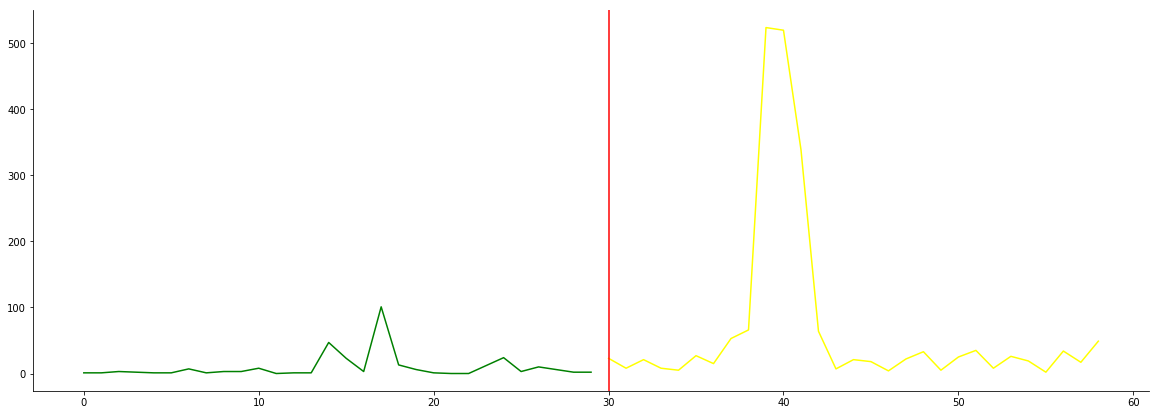

In [16]:
df=df[df['Gare de départ']=='PARIS NORD']
df=df.sort_values(by=[df.columns[0],df.columns[1]])
df=df[['Année','Mois','Gare de départ','Nombre de circulations prévues','Nombre de trains annulés']]
dd1 = df.groupby(['Année','Mois'])['Nombre de trains annulés'].sum().to_numpy()

result1 = Segmentation_Binaire(dd1, 0, len(dd1), 0.01)
result1.sort()

print("k_rupture = ", result1)
print('Paris Nord', " : ",'Nombre de trains annulés' )
fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(111)
    # cacher les cadres : haut et droit
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


ax1.xaxis.set_ticks_position('bottom')

l1 = [k for k in range(result1[0])]
#l2 = [k for k in range(result1[0],result1[1])]
#l3 = [k for k in range(result1[1],result1[2])]
l4 = [k for k in range(result1[0],dd1.shape[0])]

plt.plot(l1,dd1[:result1[0]], color = 'green')
#plt.plot(l2,dd1[result1[0]:result1[1]], color = 'blue')
#plt.plot(l3,dd1[result1[1]:result1[2]], color = 'orange')
plt.plot(l4,dd1[result1[0]:], color = 'yellow')

#plt.plot(l1,dd[:result1[0]], color = 'green')
#plt.plot(l2,dd[result1[0]:], color = 'blue')
for i in result1 :
    plt.axvline(x=i,color='red')

plt.show()

### Lille

0.00186260873391
0.0108128071081
0.0450306880377
k_rupture =  [12]
Lille  :  Nombre de circulations prévues


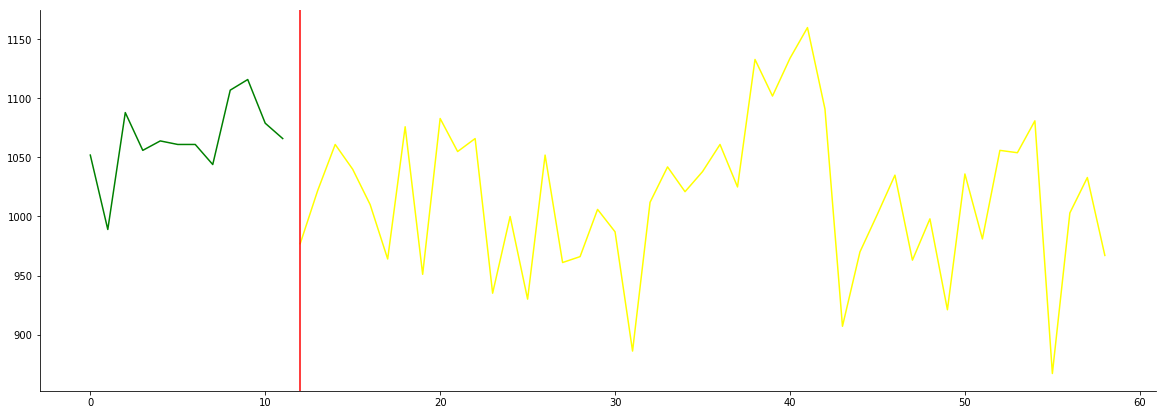

In [17]:
df=pandas.read_table(fichier,sep=";")
df.head(5)  #  afficher les 5 premières lignes
df=df.sort_values(by=[df.columns[0] , df.columns[1]])
df.head(9)

df=df[df['Gare de départ']=='LILLE']
df=df.sort_values(by=[df.columns[0],df.columns[1]])
df=df[['Année','Mois','Gare de départ','Nombre de circulations prévues','Nombre de trains annulés']]
dd = df.groupby(['Année','Mois'])['Nombre de circulations prévues'].sum().to_numpy()

result1 = Segmentation_Binaire(dd, 0, len(dd), 0.005)
result1.sort()

print("k_rupture = ", result1)
print('Lille', " : ",'Nombre de circulations prévues' )
fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(111)
    # cacher les cadres : haut et droit
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


ax1.xaxis.set_ticks_position('bottom')

l1 = [k for k in range(result1[0])]
#l2 = [k for k in range(result1[0],result1[1])]
#l3 = [k for k in range(result1[1],result1[2])]
#l4 = [k for k in range(result1[2],result1[3])]
#l5 = [k for k in range(result1[3],result1[4])]
l6 = [k for k in range(result1[0],dd.shape[0])]

plt.plot(l1,dd[:result1[0]], color = 'green')
#plt.plot(l2,dd[result1[0]:result1[1]], color = 'blue')
#plt.plot(l3,dd[result1[1]:result1[2]], color = 'black')
#plt.plot(l4,dd[result1[2]:result1[3]], color = 'purple')
#plt.plot(l5,dd[result1[3]:result1[4]], color = 'orange')
plt.plot(l6,dd[result1[0]:], color = 'yellow')

#plt.plot(l1,dd[:result1[0]], color = 'green')
#plt.plot(l2,dd[result1[0]:], color = 'blue')
for i in result1 :
    plt.axvline(x=i,color='red')

plt.show()

9.55256625691e-08
0.0268735088201
0.0510285317998
k_rupture =  [33]
Lille  :  Nombre de trains annulés


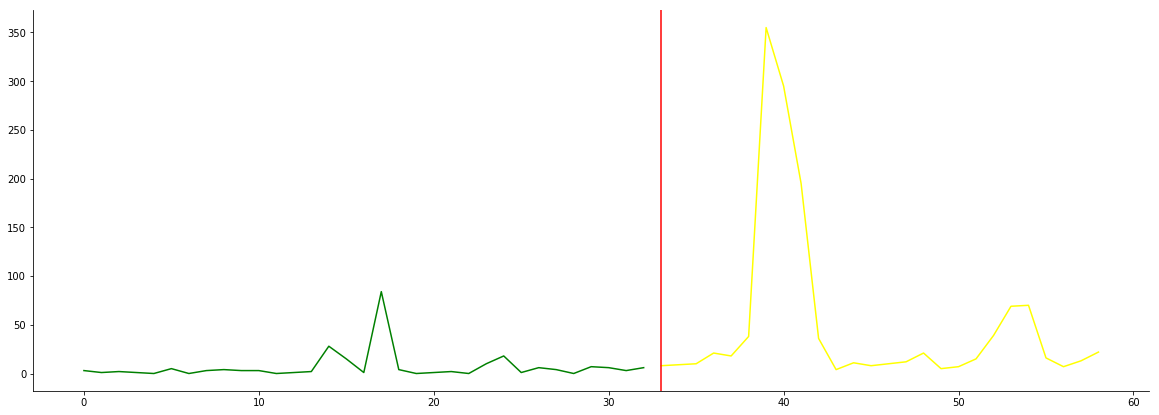

In [18]:
df=df[df['Gare de départ']=='LILLE']
df=df.sort_values(by=[df.columns[0],df.columns[1]])
df=df[['Année','Mois','Gare de départ','Nombre de circulations prévues','Nombre de trains annulés']]
dd1 = df.groupby(['Année','Mois'])['Nombre de trains annulés'].sum().to_numpy()

result1 = Segmentation_Binaire(dd1, 0, len(dd1), 0.01)
result1.sort()

print("k_rupture = ", result1)
print('Lille', " : ",'Nombre de trains annulés' )
fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(111)
    # cacher les cadres : haut et droit
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


ax1.xaxis.set_ticks_position('bottom')

l1 = [k for k in range(result1[0])]
#l2 = [k for k in range(result1[0],result1[1])]
#l3 = [k for k in range(result1[1],result1[2])]
l4 = [k for k in range(result1[0],dd1.shape[0])]

plt.plot(l1,dd1[:result1[0]], color = 'green')
#plt.plot(l2,dd1[result1[0]:result1[1]], color = 'blue')
#plt.plot(l3,dd1[result1[1]:result1[2]], color = 'orange')
plt.plot(l4,dd1[result1[0]:], color = 'yellow')

#plt.plot(l1,dd[:result1[0]], color = 'green')
#plt.plot(l2,dd[result1[0]:], color = 'blue')
for i in result1 :
    plt.axvline(x=i,color='red')

plt.show()